In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
print("All libraries have been imported")


All libraries have been imported


In [466]:
#importation du jeu d données
dataset= pd.read_excel("C:/Users/hp\Documents/MASTER/Master2/Python-For-DS/TP/Tourist-accomodation-From-2007.xlsx")

In [467]:
dataset.drop(columns=["H03","H15","_LABEL_","H01","H02","H25","H16","H17"], inplace=True)
dataset = dataset.iloc[15:40, :]
dataset.rename(columns={"H04":"month"}, inplace=True)
dataset = dataset.set_index("month")
dataset = dataset.T
dataset.head()

month     Income per stay unit nights sold - Total industry  \
MO012007                                              704.3   
MO022007                                              731.8   
MO032007                                              718.9   
MO042007                                              674.6   
MO052007                                              656.8   

month     Income per stay unit nights sold - Hotels  \
MO012007                                      833.7   
MO022007                                      895.9   
MO032007                                      851.5   
MO042007                                      819.2   
MO052007                                      795.0   

month     Income per stay unit nights sold - Caravan parks and camping sites  \
MO012007                                              463.4                    
MO022007                                              422.5                    
MO032007                                              372.5                    
MO042007                                              308.2                    
MO052007                                              408.5                    

month     Income per stay unit nights sold - Guest houses and guest farms  \
MO012007                                              318.3                 
MO022007                                              307.3                 
MO032007                                              373.9                 
MO042007                                              240.0                 
MO052007                                              234.3                 

month     Income per stay unit nights sold - Other accommodation  \
MO012007                                              606.8        
MO022007                                              538.3        
MO032007                                              551.7        
MO042007                                              575.5        
MO052007                                              495.1        

month     Income from accommodation - Total industry  \
MO012007                                      1201.1   
MO022007                                      1316.9   
MO032007                                      1383.9   
MO042007                                      1227.9   
MO052007                                      1128.9   

month     Income from accommodation - Hotels  \
MO012007                               866.5   
MO022007                              1004.8   
MO032007                              1036.0   
MO042007                               903.7   
MO052007                               879.3   

month     Income from accommodation - Caravan parks and camping sites  \
MO012007                                                3.8             
MO022007                                                3.0             
MO032007                                                3.8             
MO042007                                                4.5             
MO052007                                                2.9             

month     Income from accommodation - Guest houses and guest farms  \
MO012007                                               75.5          
MO022007                                               69.2          
MO032007                                               86.3          
MO042007                                               60.4          
MO052007                                               47.8          

month     Income from accommodation - Other accommodation  ...  \
MO012007                                            255.3  ...   
MO022007                                            239.9  ...   
MO032007                                            257.8  ...   
MO042007                                            259.3  ...   
MO052007                                            198.9  ...   

month     Other income - Total industry  Other income 

In [468]:
import datetime

def transform_to_date(text:str):
    year = int(text[4:])
    month = int(text[2:4])
    return f"{year}-0{month}"

In [469]:
dataset.index = [transform_to_date(text) for text in dataset.index]
dataset.head()

month    Income per stay unit nights sold - Total industry  \
2007-01                                              704.3   
2007-02                                              731.8   
2007-03                                              718.9   
2007-04                                              674.6   
2007-05                                              656.8   

month    Income per stay unit nights sold - Hotels  \
2007-01                                      833.7   
2007-02                                      895.9   
2007-03                                      851.5   
2007-04                                      819.2   
2007-05                                      795.0   

month    Income per stay unit nights sold - Caravan parks and camping sites  \
2007-01                                              463.4                    
2007-02                                              422.5                    
2007-03                                              372.5                    
2007-04                                              308.2                    
2007-05                                              408.5                    

month    Income per stay unit nights sold - Guest houses and guest farms  \
2007-01                                              318.3                 
2007-02                                              307.3                 
2007-03                                              373.9                 
2007-04                                              240.0                 
2007-05                                              234.3                 

month    Income per stay unit nights sold - Other accommodation  \
2007-01                                              606.8        
2007-02                                              538.3        
2007-03                                              551.7        
2007-04                                              575.5        
2007-05                                              495.1        

month    Income from accommodation - Total industry  \
2007-01                                      1201.1   
2007-02                                      1316.9   
2007-03                                      1383.9   
2007-04                                      1227.9   
2007-05                                      1128.9   

month    Income from accommodation - Hotels  \
2007-01                               866.5   
2007-02                              1004.8   
2007-03                              1036.0   
2007-04                               903.7   
2007-05                               879.3   

month    Income from accommodation - Caravan parks and camping sites  \
2007-01                                                3.8             
2007-02                                                3.0             
2007-03                                                3.8             
2007-04                                                4.5             
2007-05                                                2.9             

month    Income from accommodation - Guest houses and guest farms  \
2007-01                                               75.5          
2007-02                                               69.2          
2007-03                                               86.3          
2007-04                                               60.4          
2007-05                                               47.8          

month    Income from accommodation - Other accommodation  ...  \
2007-01                                            255.3  ...   
2007-02                                            239.9  ...   
2007-03                                            257.8  ...   
2007-04                                            259.3  ...   
2007-05                                            198.9  ...   

month    Other income - Total industry  Other income - Hotels  \
2007-01                          341.8           

In [471]:
#traction de la colone à modeliser
d= dataset["Total income - Other accommodation"]
d.index.name="month"
d.index = pd.period_range(start='2007-01-1',  end='2023-10-1', freq='M')

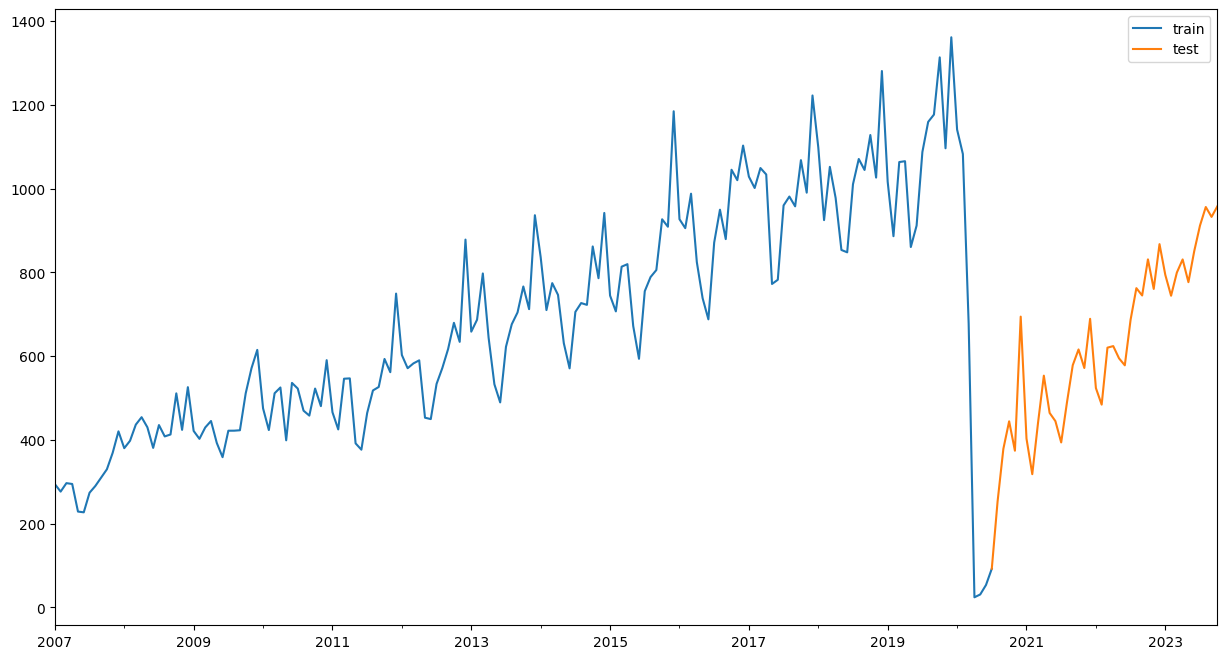

In [472]:
# Séparation en données d'entrainnment et du test et affichage du graphique
split_date = pd.Timestamp('2020-07')
df1 = dataset["Total income - Other accommodation"]
train = df1.loc[:split_date]
test = df1.loc[split_date:]
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [478]:

print("Nous avons", len(train), "valeurs d'entrainements")
print("Nous avons", len(test), "Valeurs de test")

Nous avons 163 valeurs d'entrainements
Nous avons 40 Valeurs de test


In [479]:
train_processed = d.values
train_processed = train_processed[0:163:1]
test_processed = d.values
test_processed = test_processed[162:202:1]

In [480]:
train_processed.reshape(-1,1)
test_processed.reshape(-1,1)

array([[ 92.1],
       [252.5],
       [378.3],
       [444.2],
       [374. ],
       [694.2],
       [403. ],
       [317.9],
       [441.2],
       [553.2],
       [464.2],
       [444.6],
       [393.7],
       [489.5],
       [578.2],
       [615.8],
       [571.5],
       [689. ],
       [523.6],
       [484. ],
       [620.1],
       [623.8],
       [594.6],
       [577.9],
       [686.8],
       [762.2],
       [744.7],
       [831. ],
       [760.4],
       [867.3],
       [794. ],
       [744.1],
       [799.5],
       [830.8],
       [776.5],
       [850.4],
       [911.8],
       [956. ],
       [932.4],
       [957.6]])

In [481]:
# We split train and test again
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed.reshape(-1,1))
test_sc = scaler.transform(test_processed.reshape(-1,1))
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [482]:
#Modele ANN
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
162/162 [==============================] - 9s 3ms/step - loss: 0.0492
Epoch 2/100
162/162 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 9/100
162/162 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 10/100
162/162 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 11/100
162/162 [==============================] - 0s 3ms/step - loss: 0.0319
Epoch 12/100
162/162 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 13/100


In [483]:
#Evaluation du model
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

6/6 [==============================] - 0s 7ms/step
The R2 score on the Train set is:	0.823
The R2 score on the Test set is:	0.707


In [223]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)


for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [224]:
X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (162, 1, 1)
Test shape:  (39, 1, 1)


In [225]:
lstm_model = Sequential()
lstm_model.add(LSTM(5, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
162/162 [==============================] - 3s 3ms/step - loss: 0.2900
Epoch 2/200
162/162 [==============================] - 0s 3ms/step - loss: 0.1996
Epoch 3/200
162/162 [==============================] - 0s 3ms/step - loss: 0.1563
Epoch 4/200
162/162 [==============================] - 1s 3ms/step - loss: 0.1396
Epoch 5/200
162/162 [==============================] - 0s 3ms/step - loss: 0.1342
Epoch 6/200
162/162 [==============================] - 0s 3ms/step - loss: 0.1324
Epoch 7/200
162/162 [==============================] - 0s 3ms/step - loss: 0.1317
Epoch 8/200
162/162 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 9/200
162/162 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 10/200
162/162 [==============================] - 0s 2ms/step - loss: 0.1309
Epoch 11/200
162/162 [==============================] - 0s 2ms/step - loss: 0.1308
Epoch 12/200
162/162 [==============================] - 0s 2ms/step - loss: 0.1307
Epoch 13/200


In [226]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

6/6 [==============================] - 0s 3ms/step
The R2 score on the Train set is:	0.106
The R2 score on the Test set is:	-3.526


In [110]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

39/39 [==============================] - 1s 4ms/step - loss: 0.0351
NN: 0.035901
LSTM: 0.035057


In [484]:
nn_y_pred_test = nn_model.predict(X_test)


2/2 [==============================] - 0s 22ms/step


In [78]:
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

2/2 [==============================] - 0s 4ms/step


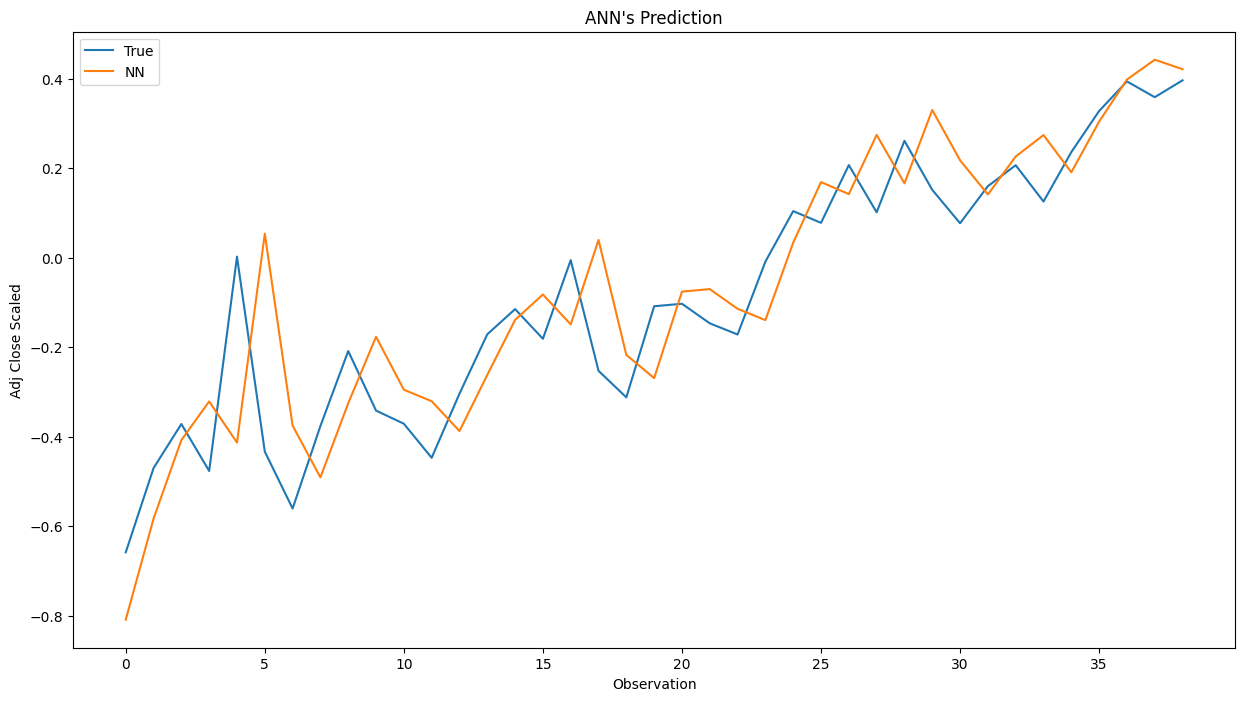

In [485]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

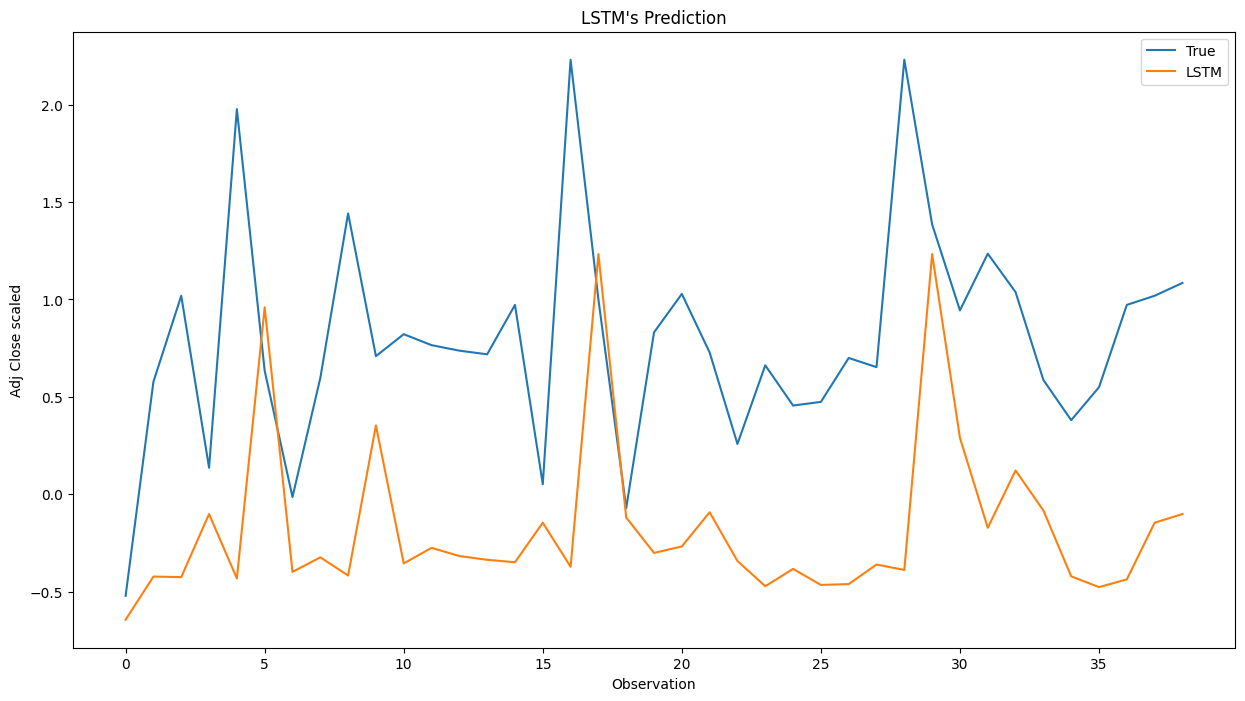

In [79]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(lstm_y_pred_test, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

In [ ]:
# show prediction
x_input = np.array(x_input)
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print('prediction: for x_input = {}, yhat = {}, y_expected = {}'.format(x_input, yhat, y_expected))

In [1]:
import pandas as pd
import os
import joblib


def get_sectors():
    path = os.path.abspath('C:/Users/hp/Documents/MASTER/Master2/Python-For-DS/prices-prediction/models/secteur.pkl')
    return joblib.load(path)


def get_models():
    path = os.path.abspath('C:/Users/hp/Documents/MASTER/Master2/Python-For-DS/prices-prediction/models/model.pkl')
    return joblib.load(path)


sectors = get_sectors()
models = get_models()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hp\\Documents\\MASTER\\Master2\\Python-For-DS\\prices-prediction\\models\\secteur.pkl'

In [562]:
sectors


['Income per stay unit nights sold - Total industry',
 'Income per stay unit nights sold - Hotels',
 'Income per stay unit nights sold - Caravan parks and camping sites',
 'Income per stay unit nights sold - Guest houses and guest farms',
 'Income per stay unit nights sold - Other accommodation',
 'Income from accommodation - Total industry',
 'Income from accommodation - Hotels',
 'Income from accommodation - Caravan parks and camping sites',
 'Income from accommodation - Guest houses and guest farms',
 'Income from accommodation - Other accommodation',
 'Income from restaurant and bar sales - Total industry',
 'Income from restaurant and bar sales - Hotels',
 'Income from restaurant and bar sales - Caravan parks and camping sites',
 'Income from restaurant and bar sales - Guest houses and guest farms',
 'Income from restaurant and bar sales - Other accommodation',
 'Other income - Total industry',
 'Other income - Hotels',
 'Other income - Caravan parks and camping sites',
 'Other in

In [493]:
seceteurs = ['Revenu par unité de séjour et par nuitée vendue - Ensemble de l\'industrie','Revenu par unité de séjour et par nuitée vendue - Hôtels',
 'Revenu par unité de séjour et par nuit vendue - Parcs de caravanes et campings','Revenu par unité de séjour et par nuit vendue - Hôtels',
'Revenu par unité de séjour et par nuit vendue - Maisons d\'hôtes et fermes d\'hôtes','Revenu par unité de séjour et par nuit vendue - Autres hébergements',
 'Revenu par unité de séjour vendue - Autres hébergements',
 'Revenu de l\'hébergement - Ensemble de l\'industrie',
 'Revenu de l\'hébergement - Hôtels',
'Revenu de l\'hébergement - Parcs de caravanes et campings', 'Revenu de l\'hébergement - Total industrie','Revenu de l\'hébergement - Hôtels',
 'Revenu de l\'hébergement - Maisons d\'hôtes et fermes d\'hôtes',
 'Revenu de l\'hébergement - Autres hébergements',
 'Revenus de la restauration et des bars - Ensemble de l\'industrie',
 'Revenu de la restauration et des bars - Hôtels',
 'Revenus des restaurants et des bars - Parcs de caravanes et campings',
 'Revenu des ventes de restaurants et de bars - Maisons d\'hôtes et fermes d\'hôtes', 'Revenu des ventes de restaurants et de bars - Hôtels',
 'Recettes provenant de la vente de restaurants et de bars - Autres hébergements',
 'Autres revenus - Ensemble de l\'industrie'
 'Autres revenus - Hôtels',
 'Autres revenus - Parcs de caravanes et campings',
 'Autres revenus - Maisons d\'hôtes et fermes d\'hôtes',
 'Autres revenus - Autres hébergements',
 'Total des revenus - Ensemble de l\'industrie',
 'Revenu total - Hôtels',
 'Revenu total - parcs de caravanes et campings','Revenu total - hôtels','Revenu total - hôtels', 'Revenu total - hôtels',
 'Total des revenus - Maisons d\'hôtes et fermes d\'hôtes',
 'Revenu total - Autres hébergements']

In [560]:
seceteurs

["Revenu par unité de séjour et par nuitée vendue - Ensemble de l'industrie",
 'Revenu par unité de séjour et par nuitée vendue - Hôtels',
 'Revenu par unité de séjour et par nuit vendue - Parcs de caravanes et campings',
 'Revenu par unité de séjour et par nuit vendue - Hôtels',
 "Revenu par unité de séjour et par nuit vendue - Maisons d'hôtes et fermes d'hôtes",
 'Revenu par unité de séjour et par nuit vendue - Autres hébergements',
 'Revenu par unité de séjour vendue - Autres hébergements',
 "Revenu de l'hébergement - Ensemble de l'industrie",
 "Revenu de l'hébergement - Hôtels",
 "Revenu de l'hébergement - Parcs de caravanes et campings",
 "Revenu de l'hébergement - Total industrie",
 "Revenu de l'hébergement - Hôtels",
 "Revenu de l'hébergement - Maisons d'hôtes et fermes d'hôtes",
 "Revenu de l'hébergement - Autres hébergements",
 "Revenus de la restauration et des bars - Ensemble de l'industrie",
 'Revenu de la restauration et des bars - Hôtels',
 'Revenus des restaurants et des

In [497]:
models.head()


KeyboardInterrupt



In [566]:
df = pd.DataFrame.from_dict(models)
df.head()

secteur  \
0  Income per stay unit nights sold - Total industry   
1          Income per stay unit nights sold - Hotels   
2  Income per stay unit nights sold - Caravan par...   
3  Income per stay unit nights sold - Guest house...   
4  Income per stay unit nights sold - Other accom...   

                                         predictions  
0  2023-08    1674.551204
2023-09    1683.425062
...  
1  2023-08    1529.602387
2023-09    1587.900766
...  
2  2023-08    1005.239829
2023-09     993.743514
...  
3  2023-08    1089.5
2023-09     952.3
2023-10   ...  
4  2023-08    2546.585534
2023-09    2457.847204
...

In [571]:
dfs= []
for i in range(0,20):
    dfi = df['predictions'][i]
    di = dfi.to_frame()
    dfs.append(di)

dfs

[         Income per stay unit nights sold - Total industry
 2023-08                                        1674.551204
 2023-09                                        1683.425062
 2023-10                                        1766.992583
 2023-11                                        1782.217139
 2023-12                                        1948.196553
 2024-01                                        1875.617488
 2024-02                                        1845.366979
 2024-03                                        1799.843291
 2024-04                                        1701.888165
 2024-05                                        1618.142203
 2024-06                                        1697.331255
 2024-07                                        1694.792130
 2024-08                                        1697.309000
 2024-09                                        1689.048903
 2024-10                                        1763.109999
 2024-11                                

In [572]:
prediction = pd.concat(dfs, axis=1)

In [573]:
prediction.head()

Income per stay unit nights sold - Total industry  \
2023-08                                        1674.551204   
2023-09                                        1683.425062   
2023-10                                        1766.992583   
2023-11                                        1782.217139   
2023-12                                        1948.196553   

         Income per stay unit nights sold - Hotels  \
2023-08                                1529.602387   
2023-09                                1587.900766   
2023-10                                1615.100123   
2023-11                                1636.241301   
2023-12                                1772.034633   

         Income per stay unit nights sold - Caravan parks and camping sites  \
2023-08                                        1005.239829                    
2023-09                                         993.743514                    
2023-10                                         992.728985                    
2023-11                                        1005.653566                    
2023-12                                        1289.801771                    

         Income per stay unit nights sold - Guest houses and guest farms  \
2023-08                                             1089.5                 
2023-09                                              952.3                 
2023-10                                             1027.3                 
2023-11                                             1119.2                 
2023-12                                             1119.7                 

         Income per stay unit nights sold - Other accommodation  \
2023-08                                        2546.585534        
2023-09                                        2457.847204        
2023-10                                        2493.240094        
2023-11                                        2573.953085        
2023-12                                        2711.534974        

         Income from accommodation - Total industry  \
2023-08                                 2617.091352   
2023-09                                 2822.671387   
2023-10                                 3235.850745   
2023-11                                 3170.183919   
2023-12                                 3544.887720   

         Income from accommodation - Hotels  \
2023-08                              1548.7   
2023-09                              1548.7   
2023-10                              1548.7   
2023-11                              1548.7   
2023-12                              1548.7   

         Income from accommodation - Caravan parks and camping sites  \
2023-08                                          17.155459             
2023-09                                          18.663438             
2023-10                                          21.811918             
2023-11                                          16.373671             
2023-12                                          37.144794             

         Income from accommodation - Guest houses and guest farms  \
2023-08                                              133.9          
2023-09                                              133.8          
2023-10                                              146.5          
2023-11                                              153.1          
2023-12                                              147.8          

         Income from accommodation - Other accommodation  \
2023-08                                       772.635723   
2023-09                                       727.754692   
2023-10                                       793.806776   
2023-11                                       760.374380   
2023-12                                       883.944913   

         Income from restaurant and bar sales - Total industry  \
2023-08                                              678.5       
2023-09              

In [574]:
mean = prediction.mean()

In [575]:
mean.head()

Income per stay unit nights sold - Total industry                     1757.540630
Income per stay unit nights sold - Hotels                             1648.092949
Income per stay unit nights sold - Caravan parks and camping sites    1063.167406
Income per stay unit nights sold - Guest houses and guest farms       1042.132000
Income per stay unit nights sold - Other accommodation                2693.363537
dtype: float64

In [576]:
mean.rename(index={'Income per stay unit nights sold - Total industry': 'Revenu par unité de séjour et par nuitée vendue - Ensemble de l\'industrie',
 'Income per stay unit nights sold - Hotels': 'Revenu par unité de séjour et par nuitée vendue - Hôtels' ,
 'Income per stay unit nights sold - Caravan parks and camping sites': 'Revenu par unité de séjour et par nuit vendue - Parcs de caravanes et campings',
 'Income per stay unit nights sold - Guest houses and guest farms': 'Revenu par unité de séjour et par nuit vendue - Maisons d\'hôtes et fermes d\'hôtes',
 'Income per stay unit nights sold - Other accommodation':'Revenu par unité de séjour et par nuit vendue - Autres hébergements',
 'Income from accommodation - Total industry':'Revenu de l\'hébergement - Ensemble de l\'industrie',
 'Income from accommodation - Hotels': 'Revenu de l\'hébergement - Hôtels',
 'Income from accommodation - Caravan parks and camping sites': 'Revenu de l\'hébergement - Parcs de caravanes et campings',
 'Income from accommodation - Guest houses and guest farms':'Revenu de l\'hébergement - Maisons d\'hôtes et fermes d\'hôtes',
 'Income from accommodation - Other accommodation': 'Revenu de l\'hébergement - Autres hébergements',
 'Income from restaurant and bar sales - Total industry':'Revenus de la restauration et des bars - Ensemble de l\'industrie',
 'Income from restaurant and bar sales - Hotels':'Revenu des ventes de restaurants et de bars - Hôtels',
 'Income from restaurant and bar sales - Caravan parks and camping sites':'Revenus des restaurants et des bars - Parcs de caravanes et campings',
 'Income from restaurant and bar sales - Guest houses and guest farms':'Revenu des ventes de restaurants et de bars - Maisons d\'hôtes et fermes d\'hôtes',
 'Income from restaurant and bar sales - Other accommodation':'Recettes provenant de la vente de restaurants et de bars - Autres hébergements',
 'Other income - Total industry': 'Autres revenus - Ensemble de l\'industrie',
 'Other income - Hotels':'Autres revenus - Hôtels',
 'Other income - Caravan parks and camping sites': 'Autres revenus - Parcs de caravanes et campings',
 'Other income - Guest houses and guest farms': 'Autres revenus - Maisons d\'hôtes et fermes d\'hôtes',
 'Other income - Other accommodation': 'Autres revenus - Autres hébergements'})

Revenu par unité de séjour et par nuitée vendue - Ensemble de l'industrie            1757.540630
Revenu par unité de séjour et par nuitée vendue - Hôtels                             1648.092949
Revenu par unité de séjour et par nuit vendue - Parcs de caravanes et campings       1063.167406
Revenu par unité de séjour et par nuit vendue - Maisons d'hôtes et fermes d'hôtes    1042.132000
Revenu par unité de séjour et par nuit vendue - Autres hébergements                  2693.363537
Revenu de l'hébergement - Ensemble de l'industrie                                    2870.993586
Revenu de l'hébergement - Hôtels                                                     1548.700000
Revenu de l'hébergement - Parcs de caravanes et campings                               21.722798
Revenu de l'hébergement - Maisons d'hôtes et fermes d'hôtes                           134.236000
Revenu de l'hébergement - Autres hébergements                                         775.509299
Revenus de la restauration et 

C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3765931374.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


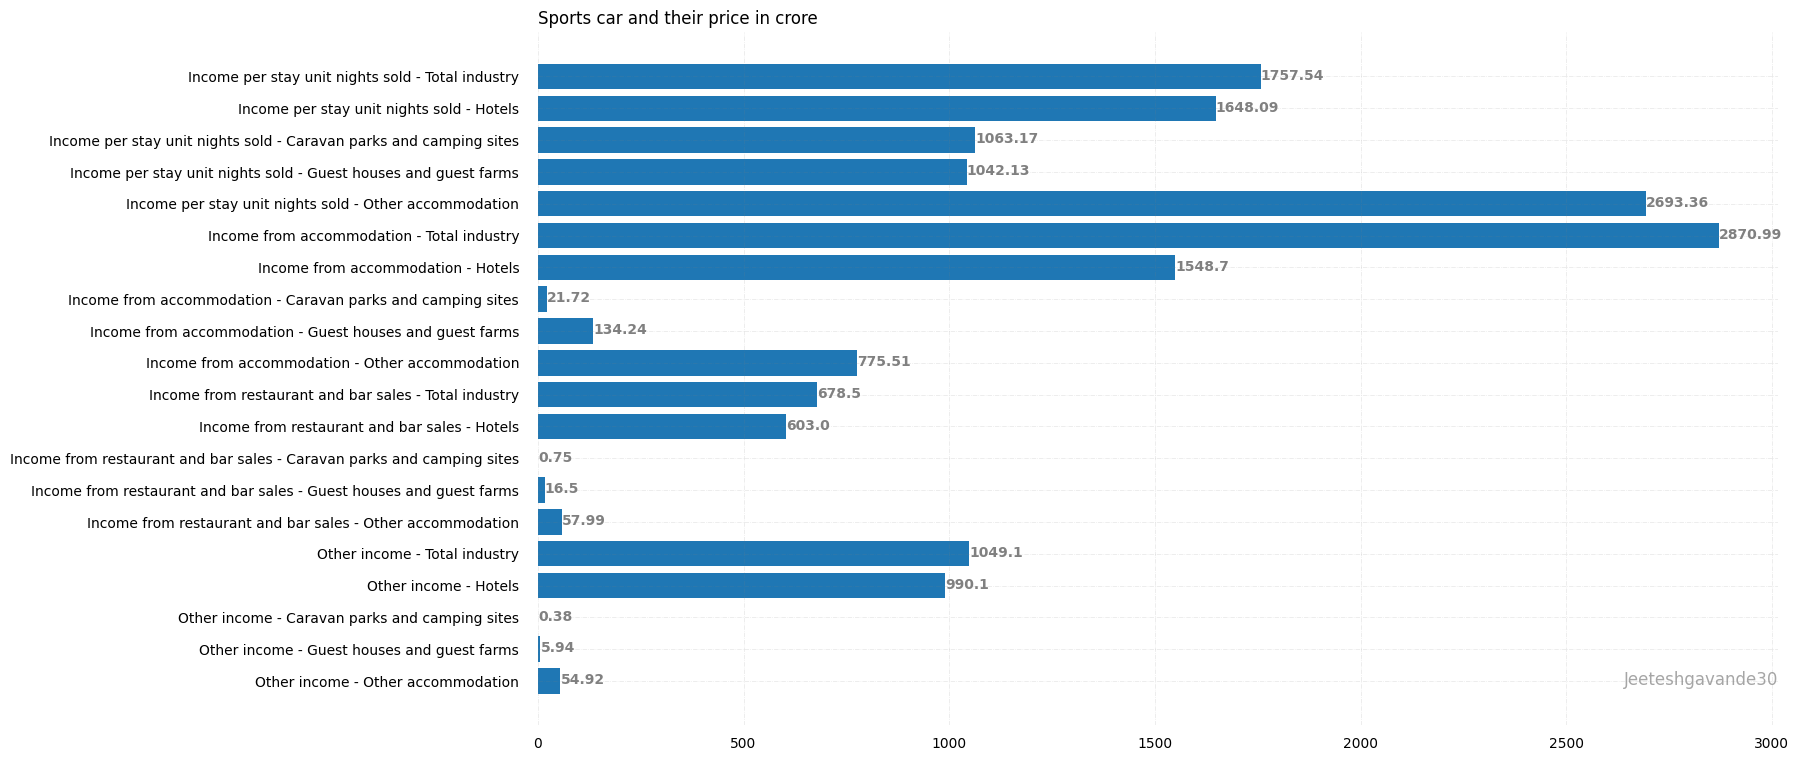

In [577]:
import pandas as pd
from matplotlib import pyplot as plt

# Read CSV into pandas


name = mean.index
price = mean.values

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(name, price)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values 
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5, 
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Sports car and their price in crore',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()
